___
# **Programa para cálculo de desempenho**
**Disciplina: Desempenho de Aeronaves**

Grupo:

- Ana Beatriz Dal Farra Bavaresco - 11232024
- Gabriel Orito de Carvalho - 11233053
- Maisa Cietto - 10309757
- Walter Tiago Bezerra Neto - 9760418
- Wesley Gonçalves da Silva - 11233140
___

# **Considerações iniciais**

O trabalho a seguir visa desenvolver um programa para o cálculo de uma missão da aeronave EMB-120 Brasília partindo do aeroporto de Leh, na Índia, em condições ISA+15 e percorrendo $1200\, \text{km}$, considerando reservas NBAA. Além disso, o código será validado para o alcance máximo, no regime "long range", decolando em MTOW ao nível do mar em condições ISA.

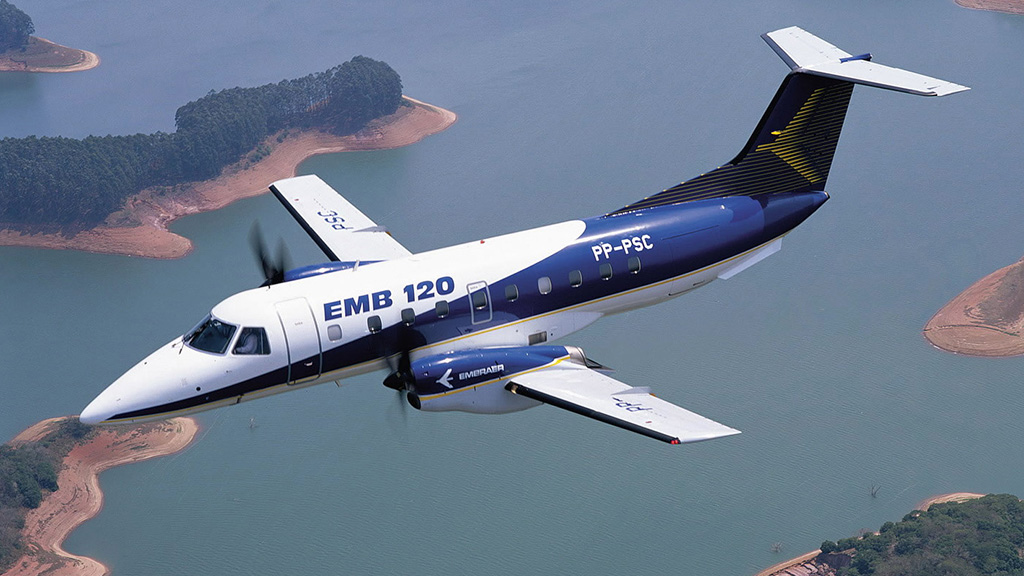

# **Voo ascendente**

Assume-se que o voo ascendente será realizado em apenas um step climb, com velocidade e ângulo de subida constante. Dessa forma, a análise será realizada considerando o fim do 4° segmento da decolagem, em 1500 ft, até o seu teto de serviço, em 29500 ft. Para determinar $C_{D_0}$ e $k$, considera-se que os flapes e o trem de pouso estão recolhidos, assim, $C_{D_0} = 0.032$ e $k = 0.021$, como evidenciado na figura abaixo.

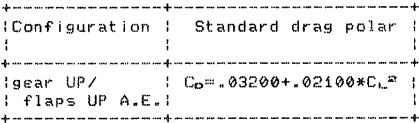

Ademais, tem-se o maior alcance possível da aeronave a partir da máxima economia de combustível dos motores à combustão. Dessa forma:

\begin{equation}
  máx\left(\frac{C_L}{C_D}\right) \rightarrow C_L = \sqrt{\frac{C_{D0}}{k}} \text{e } C_D = 2C_{D0}
\end{equation}

Considerando somente pequenos ângulos de trajetória, sabe-se que a relação de equilíbrio é simplificada de modo que $L=Wcos\gamma → L = W$. Desse modo, é possível calcular a velocidade a partir de:

\begin{equation}
  V = \sqrt{\frac{2W}{ \rho C_L S}}
\end{equation}

em que o peso $W = 112815N$ é dado a partir da condição de MTOW, a densidade $\rho$ varia de acordo com a condição atmosférica e a área da asa é dada por $S = 39.4m^2$. Dando continuidade aos cálculos, é necessário determinar também a razão de subida $\dot{h}$, sendo:

\begin{equation}
  \dot{h} = V\gamma
\end{equation}

em que o ângulo de subida $\gamma$ é dado por:

\begin{equation}
  \gamma = \frac{T-D}{W}
\end{equation}

e a tração dos $n$ motores é definida por:

\begin{equation}
  T = \frac{Pn}{V}\eta_{p}
\end{equation}

com $\eta_p = -0.1305C_L^2 + 0.8046$ sendo a eficiência da hélice. Assim, calculada a razão de subida, tem-se a altitude que a aeronave subiu igual a:

\begin{equation}
  \Delta h = \dot{h}  \Delta t
\end{equation}

Nota-se que, nesse processo, a queima de combustível é levada em consideração, ou seja, ocorre uma diminuição do peso, $\Delta W $, dada por:

\begin{equation}
  \Delta W = - P n \Delta T \hat{c} g
\end{equation}

com $\hat{c} = 303 g/kWh$ para o motor PW118. Por fim, com o novo valor de altitude determinado, basta recalcular a densidade do ar e, posteriormente, a velocidade e o ângulo de subida, a tração, o peso da aeronave e a razão de subida, até percorrer toda a altitude planejada.

Para determinar o deslocamento da aeronave durante a subida, sabe-se que ocorre um deslocamento horizontal $\Delta x$ para cada $\Delta h$ percorrido. Assim, basta realizar:

\begin{equation}
  \Delta x = \frac{\dot{h}\Delta t}{\gamma}   
\end{equation}

e somar a cada passo para calcular o deslocamento total.


# **Voo em cruzeiro**

Com base no enunciado, a velocidade de cruzeiro que será utilizada é a de máximo alcance, cujo valor é $V_{BR} = 552 \, \text{km/h} = 153.3 \, \text{m/s}$.

Além disso, uma vez que é preferível para o controle de tráfego aéreo, serão consideradas velocidade e altitude constantes. Assim, o voo ocorrerá próximo do teto operacional, com $Alt = 29500 \, \text{ft}$. Como exigido pelo enunciado, também serão consideradas as reservas NBAA para espera de 45 minutos em velocidade de cruzeiro. Dessa forma, quando o alcance máximo da aeronave, que, segundo o enunciado, é $BR = 1750 \, \text{km}$, for atingido, será necessário que haja combustível suficiente para manter a altitude de cruzeiro por 45 minutos.

Uma vez, então, que o peso de combustível varia com o tempo, será necessário atualizar o valor e, consequentemente, o peso da aeronave a cada instante de tempo. Com relação ao combustível, seu peso será dado por
\begin{equation}
	W_f = V_f \, \rho_f \, g
\end{equation}
sendo $V_f$ o volume de combustível em litros, $\rho_f = 0.8 \, \text{kg/L}$ a densidade do combustível e $g = 9.81 \, \text{m/s$^2$}$ a gravidade.
Com isso, é possível implementar o código apresentado abaixo.


# **Pouso**

O procedimento de pouso se constitui de três fases distinstas, sendo essas:

1.   Aproximação: descida cuja trajetória é definida em função dos obstáculos do aeródromo com ângulo de trajetória ($\gamma$) constante;
2.   *Flare* ou Arredondamento: mudança em $\gamma$ que prepara a aeronave para o toque, havendo o trem de pouso sido abaixado anteriormente, etapa essa que a razão de descida (RD) é tida como nula;
3. 
4.   Toque e desaceleração: uma vez em solo, a aeronave inicia procedimentos para frenagem, podendo se dar o uso de dispositivos aeordinâmicos e puramente mecânicos para se parar em uma distância de pista segura.

que, por sua vez, são ilustradas como segue por meio da figura abaixo.

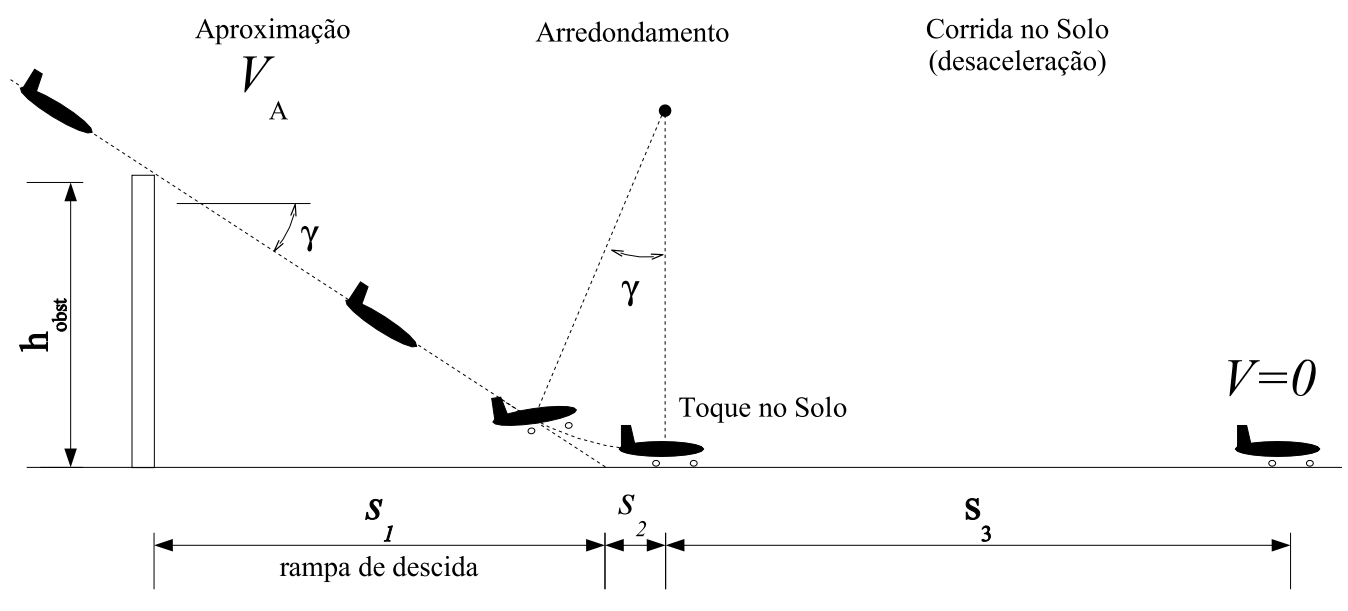

**Distância horizontal $S_{1}$**

Através da equação de equilíbrio desenvolvida por meio diagrama de corpo livre segundo a figura anterior, se tem, então:

\begin{equation}
  T - D - W \sin{\gamma} \approx 0
\end{equation}

de forma tal que, considerando a topologia da proximidade da pista de pouso, se tem que $S_{1}$ é dado geometricamente, por:

\begin{equation}
  S_{1} = \frac{h}{\tan{\gamma}}
\end{equation}

**Distância $S_{2}$**

Por hipótese simplificadora, se que a curva realizada durante a rolagem final se trata de um arco de circunferência. Desse modo, se pode relacionar a aceleração radial ($a_{r}$) com as forças atuantes na aeronave por meio do DCL contido na figura anterior: 

o que é, segundo o diagrama de corpo livre:

\begin{equation}
L - W \cos(\gamma) = ma_{r} = \frac{W}{g} \frac{V_{app}^{2}}{R}
\end{equation}

Além disso, tomando como mais uma hipótese que a velocidade durante essa manobra é constante, se tem então:

\begin{equation}
T - D - W \sin(\gamma) = 0
\end{equation}



___
# Código:

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install ambiance
!pip install ADRpy

In [ ]:
import numpy as np
from ambiance import Atmosphere as atm
from ambiance import CONST
import matplotlib.pyplot as plt
from ADRpy import atmospheres as at
from ADRpy import unitconversions as co

In [ ]:
class performance:
  def __init__(self, project, engine = 'pro', lenght_unit = 'ft', 
               mass_unit = 'SI', force_unit = 'lbf', Delta_t = .5, delta_t = 1):

    # Conversores de unidades:

    self.ft_to_m = 1/3.281
    self.lb_to_kg = 1/2.205
    self.lbf_to_N = 1/4.448

    self.conv_len = 1
    self.conv_m = 1
    self.conv_F = 1

    if lenght_unit == 'ft':
      self.conv_len = self.ft_to_m 
     
    if mass_unit == 'lb':
      self.conv_m = self.lb_to_kg

    if force_unit == 'lbf':
      self.conv_F = self.lbf_to_N
    
    # Constantes:

    self.g0 = atm(0).grav_accel
    self.g = self.g0
    self.rho0 = atm(0).density
    self.delta_t = delta_t                                         # Posição da manete de combustível/potência.
    self.eta_rho = CONST.kappa

    # Inputs:

    self.m = project['m'] * self.conv_m                            # massa [ kg | lb ]
    self.CD0 = project['CD0']
    self.k = project['k']
    self.S = project['S']                                     # Área de asa [ m^2 | ft^2 ]
    self.Delta_T_ISA = project['Delta_T_ISA']                 # Variação de temperatura ISA [ °C | K ]
    self.n_engine = project['n']
    self.P_max = project['power_max']
    self.engine = engine
    self.rho_fuel = .8

    self.W_fuel = project['V_fuel'] * self.rho_fuel * self.g

    self.W = self.m * self.g                         # Peso [ N | lbf ]

    self.W_orig = self.W

    # Cálculos vinculados à inicialização:

    self.Delta_t = Delta_t                                    # Iteração em tempo [ s ]

  # Expressões para voo permanente:

  def h_points(self, h0, hf):
    self.h0 = h0 * self.conv_len                                 # Altitude [ m | ft ]
    self.hf = hf * self.conv_len                                 # Altitude [ m | ft ]
    return

  def set_h(self, h):
    self.h = h
    return

  def set_h_params(self):
    self.g = atm(self.h).grav_accel
    self.rho = atm(self.h).density
    return
  
  def set_CL_CD(self, data):
    self.CL = data['CL']
    self.CD = data['CD']
    self.CL_max = np.max(self.CL)
    self.CD_max = np.max(self.CD)
    return

  def calculate_V(self):
    self.W_S = self.W / self.S                                   # Carga alar [ N/m^2 | lbf/ft^2 ]
    self.V = np.sqrt(2 * self.W_S / (self.rho * self.CL))
    return self.V

  def calculate_eta_pro(self):
    if self.engine[:3] == 'pro':
      self.eta_p = -0.1305 * self.CL**2 + 0.8046
    return

  # Tração e Potência disponível para os motores:

  def calculate_T_engine(self, np = 1):
    np = self.n_engine
    if self.engine[:3] == 'jet':
      self.T = self.delta_t * self.T_max * (self.rho / self.rho0)**self.eta_rho
      self.P = self.T * self.V
    
    if self.engine[:3] == 'pro':
      self.P = self.delta_t * np * self.P_max * (self.rho / self.rho0)**self.eta_rho
      self.T = self.P / self.V
    return self.T, self.P

  def calculate_flight_angle(self, flight = 'up'):
    self.flight_angle = self.T / self.W - .5 * self.rho * self.V**2 * self.CD0 / self.W_S - 2 * self.k * self.W_S / (self.rho * self.V**2)
    if flight == 'up':
      return self.flight_angle

    if flight == 'down':
      return -1 * self.flight_angle

  def calculate_T(self, T_equivalence = False):               # Tração requerida e disponível.
    self.T_req = (self.CD / self.CL + self.flight_angle)
    self.T_disp = self.delta_t * self.T_req

    if T_equivalence:
      self.T = self.T_disp
    return

  def climb_desc_ratio(self):                                 # Razão de subida/descida V_c | V_d com input de ângulo de trajetória gamma.
    self.V_cd = self.V * self.flight_angle
    return self.V_cd
  
  def calculate_V_min_T(self):                                # Velocidade para minimizar a tração.
    self.V_min_T = np.sqrt(2 * self.W_S/self.rho * np.sqrt(self.k / self.CD0))
    return

  # Dados estáticos para determinados valores constantes (Voo de subida/descida):
  
  def static_data_up_down_flight(self, flight_mode = 'up'):
    
    #inicialização dos vetores de resultado:

    res_h = []
    res_x = []
    res_t = []
    res_Vcd = []
    res_flight_angle = []
    res_W = []
    res_V = []
    res_T = []
    res_P = []
    res_frac_fuel_cd = []

    self.CL = np.sqrt(1 * self.CD0 / self.k)
    self.CD = 2 * self.CD0
    
    t = 0 # [s]

    #inicialização de dados:
    if flight_mode == 'up':
      self.h = self.h0    
      x = 0 # [m]

    if flight_mode == 'down':    
      x = self.xf # [m]

    h = self.h
    isa = at.Atmosphere(offset_deg = self.Delta_T_ISA)
    self.rho = isa.airdens_kgpm3(h) 
    W = self.W
    W0 = W

    #loop de altura e redução de peso por cada delta t

    while True:
      
      V = self.calculate_V()
      T, P = self.calculate_T_engine()
      if flight_mode == 'up':
        gamma = self.calculate_flight_angle()
        Vcd = self.climb_desc_ratio()
      if flight_mode == 'down':
        gamma = -self.calculate_flight_angle()
        Vcd = -self.climb_desc_ratio()
      
      h = h + Vcd * self.Delta_t / self.conv_len
      x = x + Vcd * self.Delta_t / gamma
      W = W - self.n_engine * P * self.Delta_t * 303 / (3.6 * 10 ** 9) * self.g

      frac_fuel_cd =  (self.W_fuel - (W0 - W)) / self.W_fuel

      t = t + self.Delta_t
      rho = isa.airdens_kgpm3(h)

      self.h = h
      self.W = W
      self.rho = rho

      # Save para resultados:

      res_h.append(h)
      res_x.append(x)
      res_t.append(t)
      res_Vcd.append(Vcd)
      res_flight_angle.append(gamma)
      res_W.append(W)
      res_V.append(V)
      res_T.append(T)
      res_P.append(P)
      res_frac_fuel_cd.append(frac_fuel_cd)

      if flight_mode == 'up' and h > self.hf:
        break

      if flight_mode == 'down' and h < self.hf:
        break

    self.res_h = res_h
    self.res_x = res_x
    self.res_t = res_t
    self.res_Vcd = res_Vcd
    self.res_flight_angle = res_flight_angle
    self.res_W = res_W
    self.res_V = res_V
    self.res_P = res_P
    self.res_T = res_T
    self.res_frac_fuel_cd = res_frac_fuel_cd

    return 

  # Voo de Cruzeiro:

  def static_data_cruise(self, xf, h = 0, V = 0, x0 = 0, W0 = 0, t_hold = 45 * 60, only_hold = False, only_cruise = False):
    
    h = self.h
    V = self.V
    x0 = self.res_x[-1]
    W0 = self.res_W[-1]
    self.xf = xf

    res_x_cruise = []
    res_t_cruise = []
    res_W_cruise = []
    res_fuel_cruise = []

    res_x_hold = []
    res_t_hold = []
    res_W_hold = []
    res_fuel_hold = []
    t = 0
    x = x0
    W = W0
    frac_fuel = 1
    
    while x < xf:
      if only_hold:
        break
      x = x + V * self.Delta_t
      W = W - self.n_engine * self.P * self.Delta_t * 303 / (3.6 * 10 ** 9) * 9.81
      t += self.Delta_t
      frac_fuel = (self.W_fuel - (W0 - W)) / self.W_fuel
      if frac_fuel <= 0:
        break

      res_x_cruise = np.append(res_x_cruise, x)
      res_t_cruise = np.append(res_t_cruise, t)
      res_W_cruise = np.append(res_W_cruise, W)
      res_fuel_cruise = np.append(res_fuel_cruise, frac_fuel)

    t_i_hold = res_t_cruise[-1] # [ s ]

    self.x_cruise_f = x
    self.t_cruise_f = t
    self.W_cruise_f = W
    self.frac_fuel_cruise_f = frac_fuel

    self.res_x_cruise = res_x_cruise
    self.res_t_cruise = res_t_cruise
    self.res_W_cruise = res_W_cruise
    self.res_fuel_cruise = res_fuel_cruise
    t = 0
    
    while t < t_hold:
      if only_cruise:
        break
      x = x + V * self.Delta_t
      W = W - self.n_engine * self.P * self.Delta_t * 303 / (3.6 * 10 ** 9) * self.g
      frac_fuel = (self.W_fuel - (W0 - W)) / self.W_fuel
      t = t + self.Delta_t
      t_i_hold = t_i_hold + self.Delta_t
      
      res_x_hold = np.append(res_x_hold, x)
      res_t_hold = np.append(res_t_hold, t_i_hold)
      res_W_hold = np.append(res_W_hold, W)
      res_fuel_hold = np.append(res_fuel_hold, frac_fuel)    

    self.res_x_hold = res_x_hold
    self.res_t_hold = res_t_hold
    self.res_W_hold = res_W_hold
    self.res_fuel_hold = res_fuel_hold
    
    return

  # Velocidades com condições para razão tração-peso:

  def calculate_velocity_TW_ratio(self):
    self.cond_1 = self.flight_angle - 2 * np.sqrt(self.k * self.CD0)
    self.cond_2 = self.flight_angle + 2 * np.sqrt(self.k * self.CD0)
    self.T_W = self.T / self.W

    if self.T_W >= self.cond_1 and self.T_W <= self.cond_2:
      self.V_1 = np.sqrt(self.W_S/(self.rho*self.CD0)*(self.T_w - self.flight_angle - np.sqrt((self.T_W - self.flight_angle)**2 - 4*self.k *self.CD0)))
      self.V_2 = np.sqrt(self.W_S/(self.rho*self.CD0)*(self.T_w - self.flight_angle + np.sqrt((self.T_W - self.flight_angle)**2 - 4*self.k *self.CD0)))
      return

  # Expressões aerodinâmicas:

  def calculate_L(self):
    self.L = .5 * self.rho * self.V**2 * self.S * self.CL
    return

  def calculate_D(self):
    self.D = .5 * self.rho * self.V**2 * self.S * self.CD
    return
  
  def calculate_CD(self, CD_equivalence = False):
    self.CD_ = self.CD0 + self.k * self.CL**2

    if CD_equivalence:
      self.CD = self.CD_

    return

  def calculate_V_stall(self):
    self.V_s = np.sqrt(2 * self.W_S / (self.rho * self.CL_max))
    return

  # Setters para variáveis:

  def set_V(self, V):
    self.V = V
    return

  def set_T(self, T):
    self.T = T
    return

# Validação para nível do mar:

O objetivo principal é validar a missão de subida, cruzeiro e descida para alcance máximo, em MTOW da aeronave, decolando de um aeroporto a nível do mar, numa condição de atmosfera ISA +15 [°C]. 

## Inputs

In [ ]:
project = {'CD0': 0.032,
       'k': 0.021,
       'm': 11500,
       'S': 39.4,
       'Delta_T_ISA': +15,
       'power_max': 1340000,
       'n': 2,
       'V_fuel': 3340,
       'x_max_cruise': 1250E03,
       }

h = {'h0': 1500,                                    # [ ft ]
     'h_cruise': 30000,                             # [ ft ]
     'hf': 1500,                                    # [ ft ]
     }

EMB = performance(project)

# Subida:

EMB.h_points(h['h0'], h['h_cruise'])
EMB.static_data_up_down_flight(flight_mode = 'up')
res_x_subida = np.array(EMB.res_x)
res_h_subida = np.array(EMB.res_h)
res_t_subida = np.array(EMB.res_t)
res_W_subida = np.array(EMB.res_W)
res_Vc = np.array(EMB.res_Vcd)
res_flight_angle_c = np.array(EMB.res_flight_angle)
res_V_subida = np.array(EMB.res_V)
res_P_subida = np.array(EMB.res_P)
res_T_subida = np.array(EMB.res_T)
res_frac_fuel_subida = np.array(EMB.res_frac_fuel_cd)

# Cruzeiro:

EMB.static_data_cruise(xf = project['x_max_cruise'])
res_x_cruise = EMB.res_x_cruise
res_t_cruise = EMB.res_t_cruise
res_W_cruise = EMB.res_W_cruise
res_frac_fuel_cruise = EMB.res_fuel_cruise

res_x_hold = EMB.res_x_hold
res_t_hold = EMB.res_t_hold
res_W_hold = EMB.res_W_hold
res_frac_fuel_hold = EMB.res_fuel_hold

# Descida:

EMB.h_points(EMB.h / EMB.ft_to_m, h['hf'])
EMB.static_data_up_down_flight(flight_mode = 'down')
res_x_descida = EMB.res_x
res_h_descida = EMB.res_h
res_t_descida = EMB.res_t
res_W_descida = EMB.res_W
res_Vd = EMB.res_Vcd
res_flight_angle_d = EMB.res_flight_angle
res_V_descida = EMB.res_V
res_P_descida = EMB.res_P
res_T_descida = EMB.res_T
res_frac_fuel_descida = EMB.res_frac_fuel_cd

## Outputs

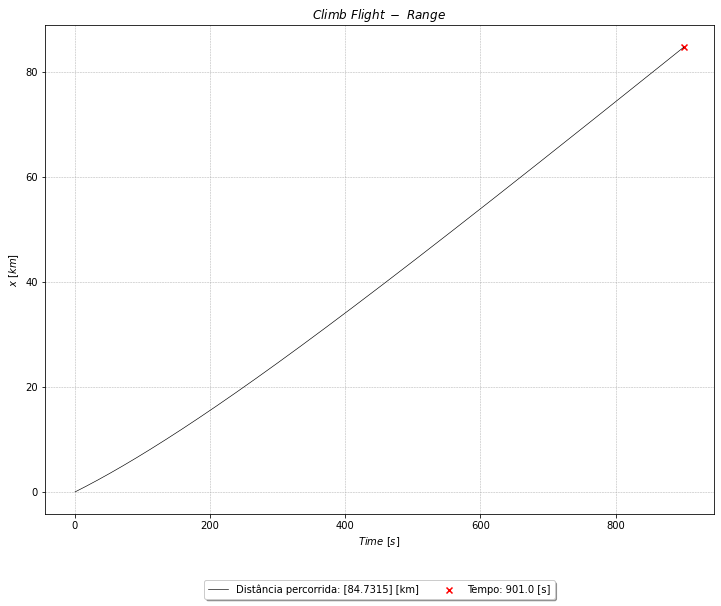

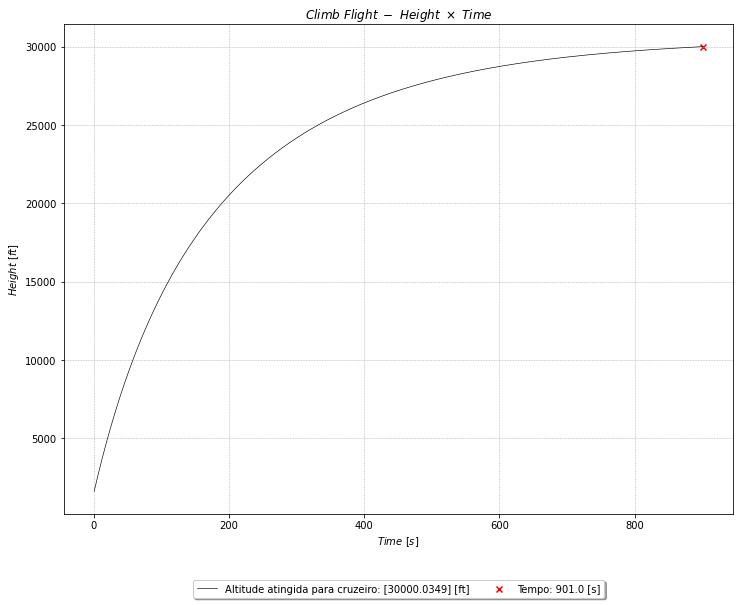

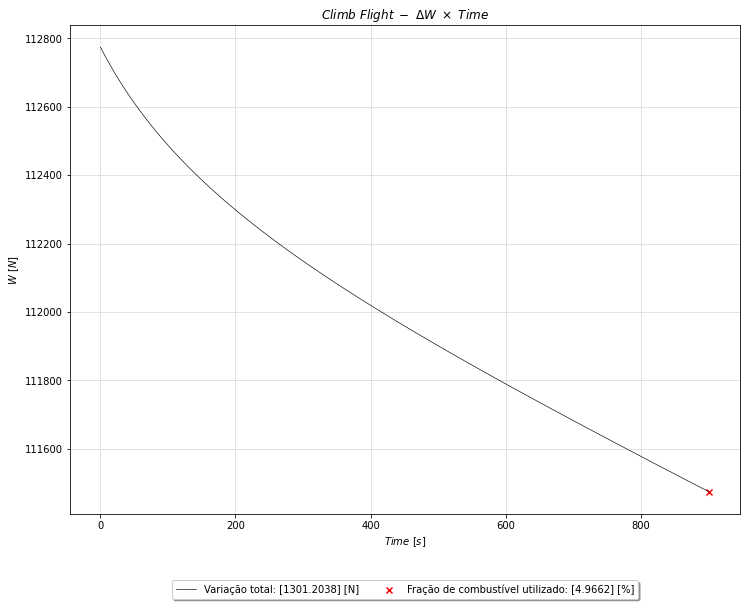

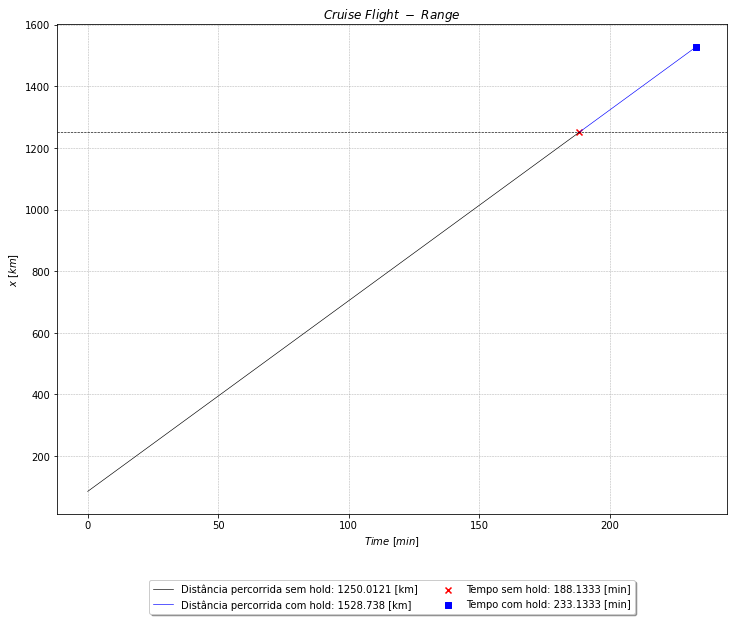

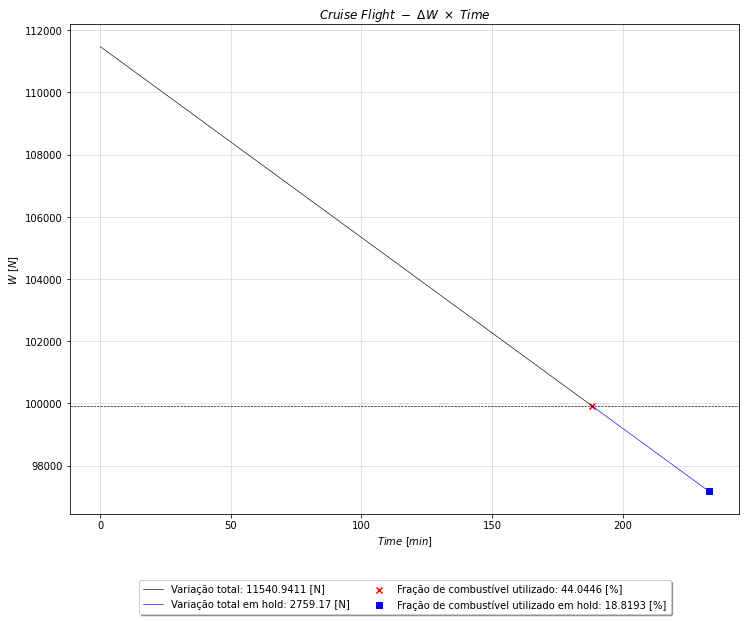

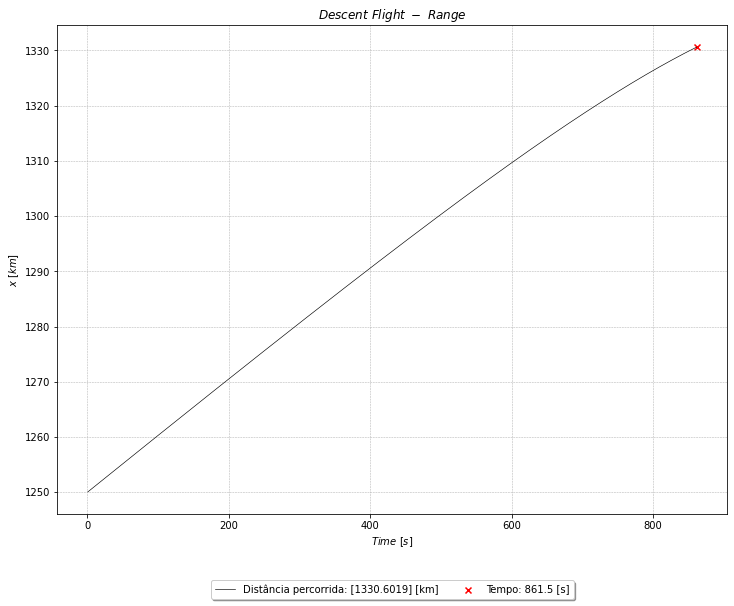

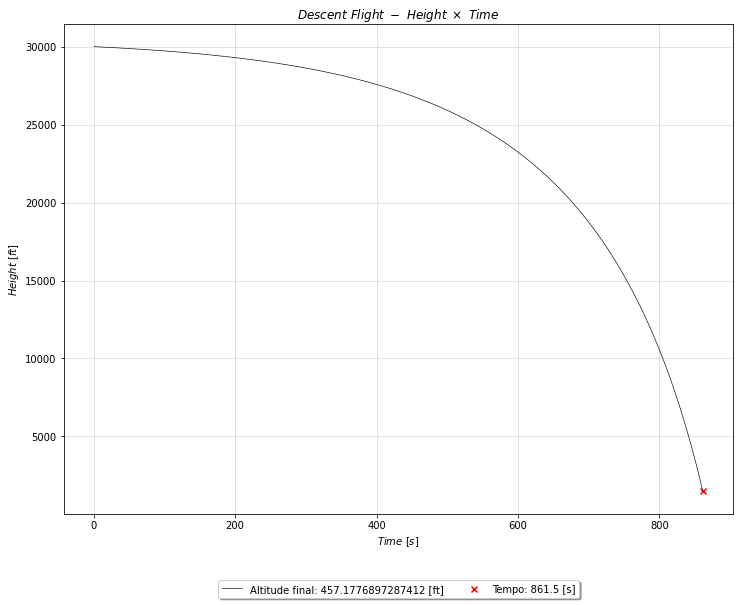

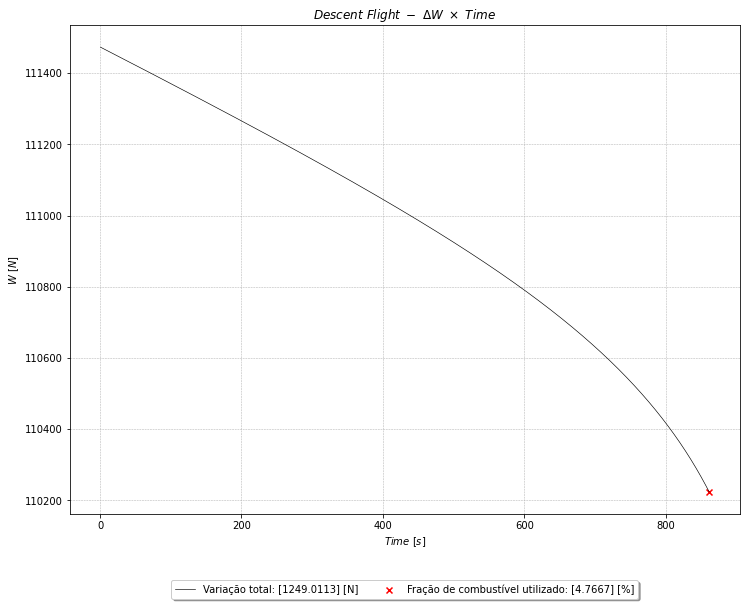

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


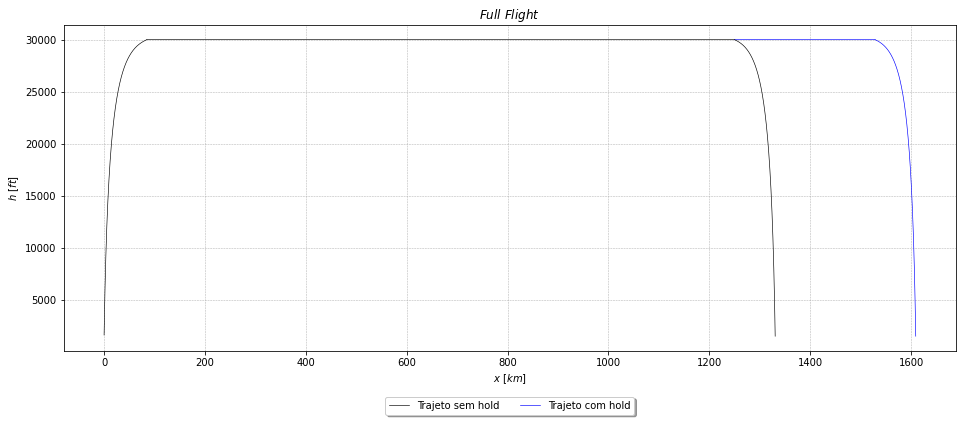

In [ ]:
# Gráficos - Voo de Subida:

fig1, ax1 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_subida, res_x_subida/1000, c='k', linewidth = .63, label = f'Distância percorrida: {np.round(np.array(res_x_subida[-1])/1000, 4)} [km]')
plt.scatter(res_t_subida[-1], res_x_subida[-1]/1000, color  = 'r', marker = 'x', label = f'Tempo: {np.round(res_t_subida[-1], 4)} [s]')
plt.title(r'$Climb \ Flight \ - \ Range$')
plt.ylabel(r'$x \ [km]$')
plt.xlabel(r'$Time \ [s]$')
plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)

plt.show()

fig2, ax2 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_subida, res_h_subida / EMB.ft_to_m, c='k', linewidth = .63, label = f'Altitude atingida para cruzeiro: {np.round(np.array(res_h_subida[-1]) / EMB.ft_to_m, 4)} [ft]')
plt.scatter(res_t_subida[-1], res_h_subida[-1] / EMB.ft_to_m, color  = 'r', marker = 'x', label = f'Tempo: {np.round(res_t_subida[-1], 4)} [s]')
plt.title(r'$Climb \ Flight \ - \ Height \ \times \ Time$')
plt.ylabel(r'$Height \ [ft]$')
plt.xlabel(r'$Time \ [s]$')
plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()

fig3, ax3 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_subida, res_W_subida, c='k', linewidth = .63, label = f'Variação total: {np.round(np.abs(res_W_subida[-1] - res_W_subida[0]), 4)} [N]')
plt.scatter(res_t_subida[-1], res_W_subida[-1], color  = 'r', marker = 'x', label = f'Fração de combustível utilizado: {np.round(np.abs(res_frac_fuel_subida[-1] - res_frac_fuel_subida[0])*100/res_frac_fuel_subida[0], 4)} [%]')

plt.title(r'$Climb \ Flight \ - \ \Delta W \ \times \ Time$')
plt.ylabel(r'$W \ [N]$')
plt.xlabel(r'$Time \ [s]$')

plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()

# Gráficos - Voo de Cruzeiro:

fig4, ax4 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_cruise / 60, res_x_cruise/1000, c='k', linewidth = .63, label = f'Distância percorrida sem hold: {np.round(res_x_cruise[-1]/1000, 4)} [km]')
plt.scatter(res_t_cruise[-1]/ 60, res_x_cruise[-1]/1000, color  = 'r', marker = 'x', label = f'Tempo sem hold: {np.round(res_t_cruise[-1]/ 60, 4)} [min]')

plt.plot(np.array(res_t_hold) / 60, np.array(res_x_hold) / 1000, c='b', linewidth = .63, label = f'Distância percorrida com hold: {np.round(res_x_hold[-1]/1000, 4)} [km]')
plt.scatter(res_t_hold[-1]/ 60, res_x_hold[-1]/1000, color  = 'b', marker = 's', label = f'Tempo com hold: {np.round(res_t_hold[-1]/ 60, 4)} [min]')

plt.axhline(y = project['x_max_cruise']/1000, linewidth = .63, linestyle = 'dashed', color = 'k')

plt.title(r'$Cruise \ Flight \ - \ Range$')
plt.ylabel(r'$x \ [km]$')
plt.xlabel(r'$Time \ [min]$')
plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)

plt.show()

fig5, ax5 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_cruise / 60, res_W_cruise, c='k', linewidth = .63, label = f'Variação total: {np.round(np.abs(res_W_cruise[-1] - res_W_cruise[0]), 4)} [N]')
plt.scatter(res_t_cruise[-1]/ 60, res_W_cruise[-1], color  = 'r', marker = 'x', label = f'Fração de combustível utilizado: {np.round(np.abs(res_frac_fuel_cruise[-1] - res_frac_fuel_cruise[0])*100/res_frac_fuel_cruise[0], 4)} [%]')

plt.plot(res_t_hold / 60, res_W_hold, c='b', linewidth = .63, label = f'Variação total em hold: {np.round(np.abs(res_W_hold[-1] - res_W_hold[0]), 4)} [N]')
plt.scatter(res_t_hold[-1]/ 60, res_W_hold[-1], color  = 'b', marker = 's', label = f'Fração de combustível utilizado em hold: {np.round(np.abs(res_frac_fuel_hold[-1] - res_frac_fuel_hold[0])*100/res_frac_fuel_hold[0], 4)} [%]')

plt.axhline(y = res_W_cruise[-1], linewidth = .63, linestyle = 'dashed', color = 'k')

plt.title(r'$Cruise \ Flight \ - \ \Delta W \ \times \ Time$')
plt.ylabel(r'$W \ [N]$')
plt.xlabel(r'$Time \ [min]$')

plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()

# Gráficos - Voo de Descida:

fig6, ax6 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_descida, np.array(res_x_descida)/1000, c='k', linewidth = .63, label = f'Distância percorrida: {np.round(np.array(res_x_descida[-1])/1000, 4)} [km]')
plt.scatter(res_t_descida[-1], np.array(res_x_descida[-1])/1000, color  = 'r', marker = 'x', label = f'Tempo: {np.round(res_t_descida[-1], 4)} [s]')
plt.title(r'$Descent \ Flight \ - \ Range$')
plt.ylabel(r'$x \ [km]$')
plt.xlabel(r'$Time \ [s]$')
plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)

plt.show()

fig6, ax6 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_descida, np.array(res_h_descida) / EMB.ft_to_m, c='k', linewidth = .63, label = f'Altitude final: {EMB.hf} [ft]')
plt.scatter(res_t_descida[-1], np.array(res_h_descida[-1]) / EMB.ft_to_m, color  = 'r', marker = 'x', label = f'Tempo: {np.round(res_t_descida[-1], 4)} [s]')
plt.title(r'$Descent \ Flight \ - \ Height \ \times \ Time$')
plt.ylabel(r'$Height \ [ft]$')
plt.xlabel(r'$Time \ [s]$')
plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()

fig7, ax7 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_descida, res_W_descida, c='k', linewidth = .63, label = f'Variação total: {np.round(np.abs(res_W_descida[-1] - res_W_descida[0]), 4)} [N]')
plt.scatter(res_t_descida[-1], res_W_descida[-1], color  = 'r', marker = 'x', label = f'Fração de combustível utilizado: {np.round(np.abs(res_frac_fuel_descida[-1] - res_frac_fuel_descida[0])*100/res_frac_fuel_descida[0], 4)} [%]')

plt.title(r'$Descent \ Flight \ - \ \Delta W \ \times \ Time$')
plt.ylabel(r'$W \ [N]$')
plt.xlabel(r'$Time \ [s]$')

plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()

# Mapa de missão:

fig8, ax8 = plt.subplots(figsize=(16, 6))

plt.plot(np.array(res_x_subida)/1000, np.array(res_h_subida) / EMB.ft_to_m, c='k', linewidth = .63)
plt.plot([np.array(res_x_subida[-1])/1000, np.array(res_x_descida[0])/1000], [np.array(res_h_subida[-1])/EMB.ft_to_m, np.array(res_h_descida[0]) / EMB.ft_to_m], c='k', linewidth = .63)
plt.plot([np.array(res_x_descida[0])/1000, np.array(res_x_hold[-1])/1000], [np.array(res_h_subida[-1])/EMB.ft_to_m, np.array(res_h_descida[0]) / EMB.ft_to_m], c='b', linewidth = .63)
plt.plot(np.array(res_x_descida)/1000, np.array(res_h_descida) / EMB.ft_to_m, c='k', linewidth = .63, label = r'Trajeto sem hold')
plt.plot((np.array(res_x_descida) + np.array(res_x_hold[-1] - res_x_hold[0]))/1000, np.array(res_h_descida) / EMB.ft_to_m, c='b', linewidth = .63, label = r'Trajeto com hold')

plt.title(r'$Full \ Flight$')
plt.ylabel(r'$h \ [ft]$')
plt.xlabel(r'$x \ [km]$')

plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()


## Validação para a missão em Leh:

Com o código validado, objetiva-se realizar uma missão de alcance 1200 (MS: + 50) [km] a partir do aeroporto de Leh, na Índia. As condições atmosféricas são de ISA +15 [°C] e é necessário considerar reservas NBAA para hold de 45 minutos em velocidade de cruzeiro. O aeroporto de Leh está a 10682 [ft] de altitude. Com isso, o final do 4° segmento é dado na altitude de 12182 [ft], de onde inicia-se a subida até a altitude de serviço de 30000 [ft].

## Inputs

In [ ]:
project = {'CD0': 0.032,
       'k': 0.021,
       'm': 11500,
       'S': 39.4,
       'Delta_T_ISA': +15,
       'power_max': 1340000,
       'n': 2,
       'V_fuel': 3340,
       'x_max_cruise': 1250E03,
       }

h = {'h0': 10682 + 1500,                            # [ ft ]
     'h_cruise': 30000,                             # [ ft ]
     'hf': 1500,                                    # [ ft ]
     }

EMB = performance(project)

# Subida:

EMB.h_points(h['h0'], h['h_cruise'])
EMB.static_data_up_down_flight(flight_mode = 'up')
res_x_subida = np.array(EMB.res_x)
res_h_subida = np.array(EMB.res_h)
res_t_subida = np.array(EMB.res_t)
res_W_subida = np.array(EMB.res_W)
res_Vc = np.array(EMB.res_Vcd)
res_flight_angle_c = np.array(EMB.res_flight_angle)
res_V_subida = np.array(EMB.res_V)
res_P_subida = np.array(EMB.res_P)
res_T_subida = np.array(EMB.res_T)
res_frac_fuel_subida = np.array(EMB.res_frac_fuel_cd)

# Cruzeiro:

EMB.static_data_cruise(xf = project['x_max_cruise'])
res_x_cruise = EMB.res_x_cruise
res_t_cruise = EMB.res_t_cruise
res_W_cruise = EMB.res_W_cruise
res_frac_fuel_cruise = EMB.res_fuel_cruise

res_x_hold = EMB.res_x_hold
res_t_hold = EMB.res_t_hold
res_W_hold = EMB.res_W_hold
res_frac_fuel_hold = EMB.res_fuel_hold

# Descida:

EMB.h_points(EMB.h / EMB.ft_to_m, h['hf'])
EMB.static_data_up_down_flight(flight_mode = 'down')
res_x_descida = EMB.res_x
res_h_descida = EMB.res_h
res_t_descida = EMB.res_t
res_W_descida = EMB.res_W
res_Vd = EMB.res_Vcd
res_flight_angle_d = EMB.res_flight_angle
res_V_descida = EMB.res_V
res_P_descida = EMB.res_P
res_T_descida = EMB.res_T
res_frac_fuel_descida = EMB.res_frac_fuel_cd

## Outputs

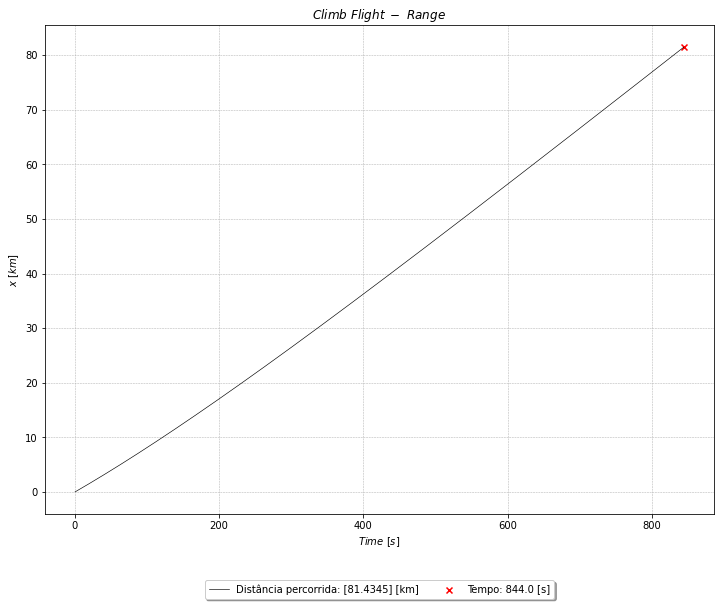

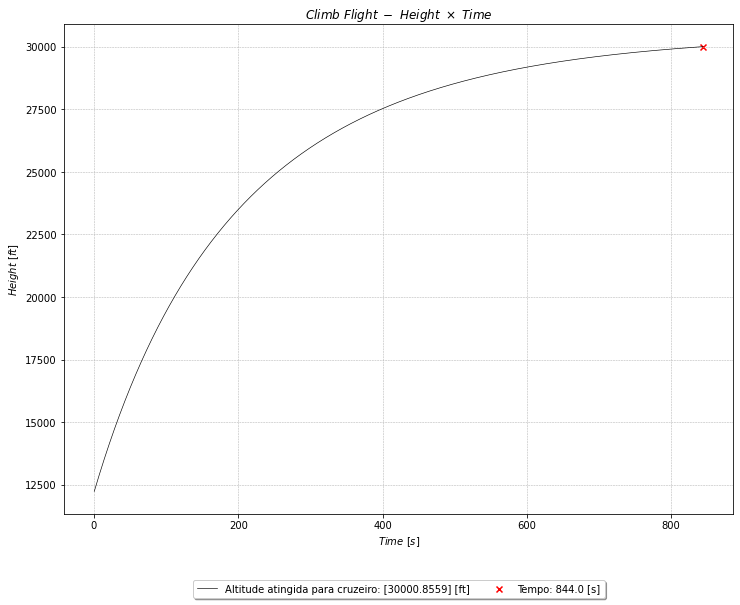

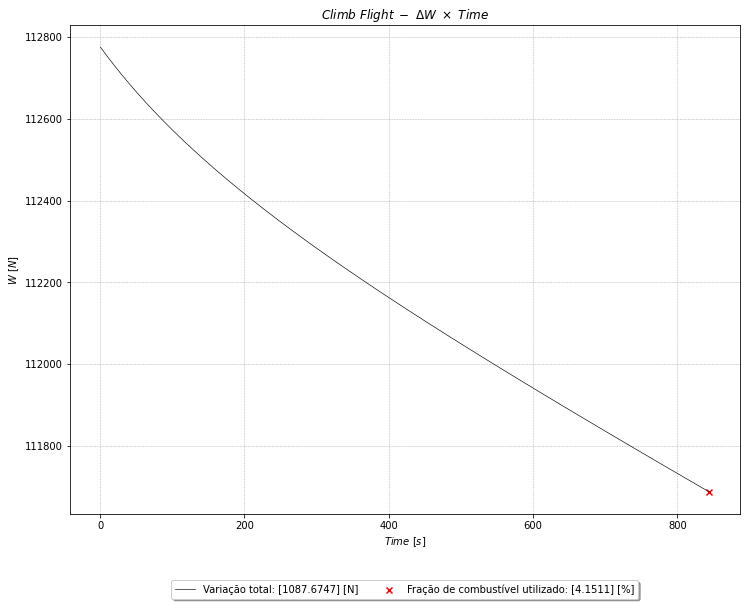

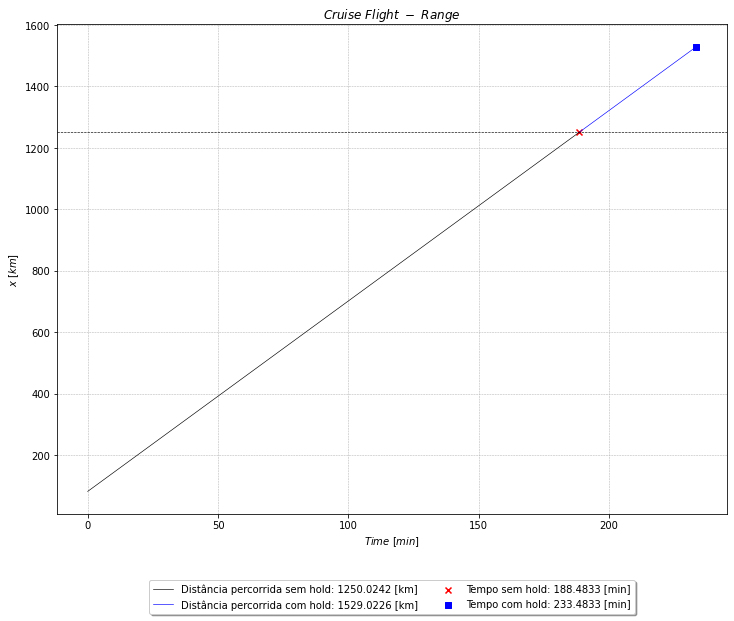

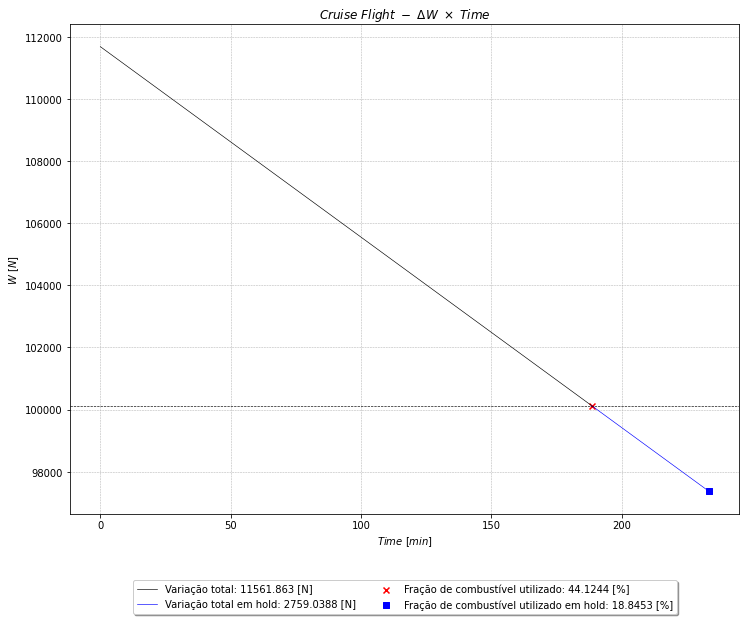

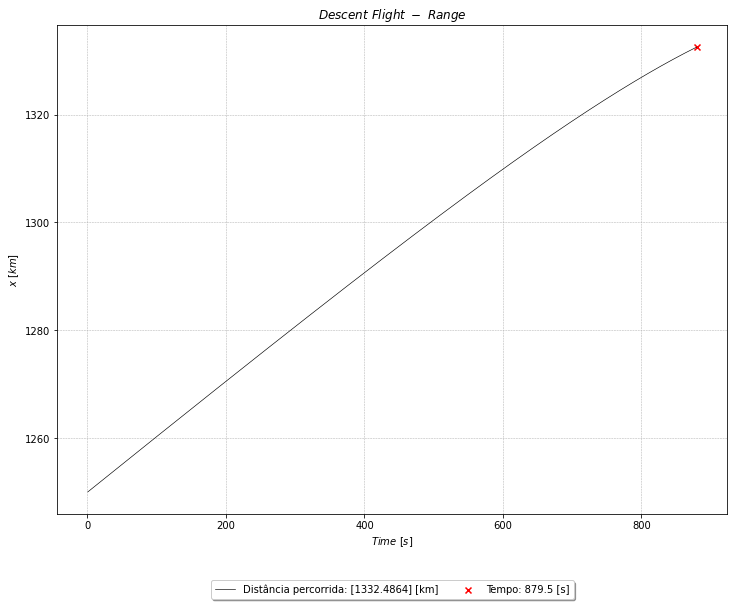

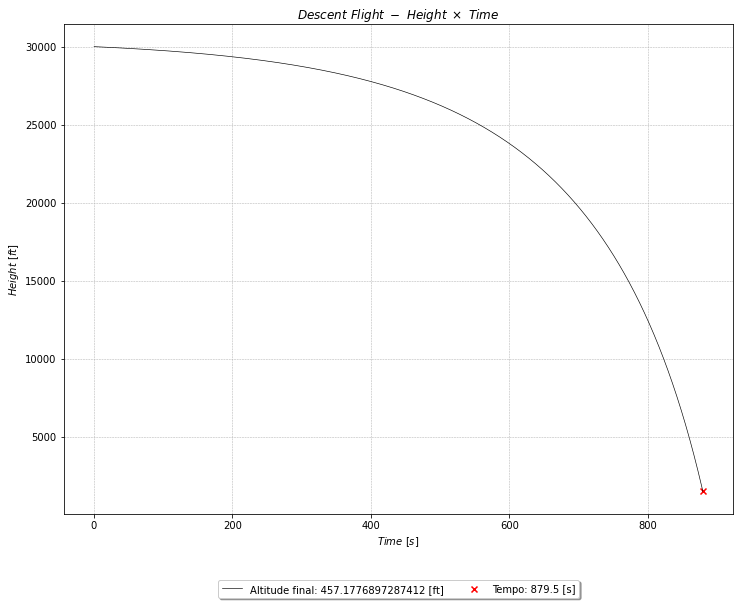

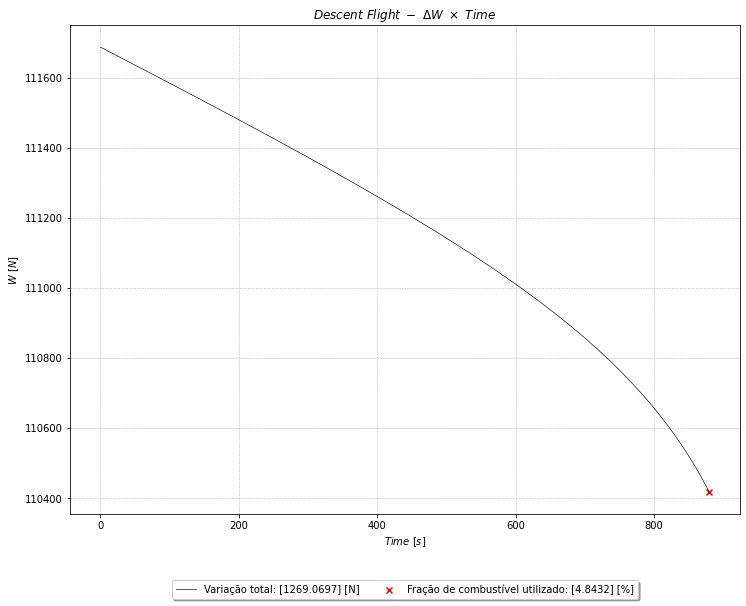

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


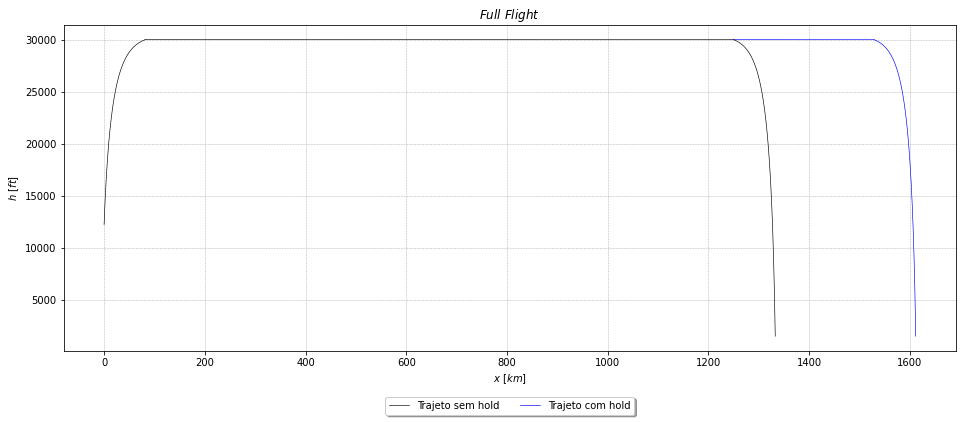

In [ ]:
# Gráficos - Voo de Subida:

fig1, ax1 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_subida, res_x_subida/1000, c='k', linewidth = .63, label = f'Distância percorrida: {np.round(np.array(res_x_subida[-1])/1000, 4)} [km]')
plt.scatter(res_t_subida[-1], res_x_subida[-1]/1000, color  = 'r', marker = 'x', label = f'Tempo: {np.round(res_t_subida[-1], 4)} [s]')
plt.title(r'$Climb \ Flight \ - \ Range$')
plt.ylabel(r'$x \ [km]$')
plt.xlabel(r'$Time \ [s]$')
plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)

plt.show()

fig2, ax2 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_subida, res_h_subida / EMB.ft_to_m, c='k', linewidth = .63, label = f'Altitude atingida para cruzeiro: {np.round(np.array(res_h_subida[-1]) / EMB.ft_to_m, 4)} [ft]')
plt.scatter(res_t_subida[-1], res_h_subida[-1] / EMB.ft_to_m, color  = 'r', marker = 'x', label = f'Tempo: {np.round(res_t_subida[-1], 4)} [s]')
plt.title(r'$Climb \ Flight \ - \ Height \ \times \ Time$')
plt.ylabel(r'$Height \ [ft]$')
plt.xlabel(r'$Time \ [s]$')
plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()

fig3, ax3 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_subida, res_W_subida, c='k', linewidth = .63, label = f'Variação total: {np.round(np.abs(res_W_subida[-1] - res_W_subida[0]), 4)} [N]')
plt.scatter(res_t_subida[-1], res_W_subida[-1], color  = 'r', marker = 'x', label = f'Fração de combustível utilizado: {np.round(np.abs(res_frac_fuel_subida[-1] - res_frac_fuel_subida[0])*100/res_frac_fuel_subida[0], 4)} [%]')

plt.title(r'$Climb \ Flight \ - \ \Delta W \ \times \ Time$')
plt.ylabel(r'$W \ [N]$')
plt.xlabel(r'$Time \ [s]$')

plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()

# Gráficos - Voo de Cruzeiro:

fig4, ax4 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_cruise / 60, res_x_cruise/1000, c='k', linewidth = .63, label = f'Distância percorrida sem hold: {np.round(res_x_cruise[-1]/1000, 4)} [km]')
plt.scatter(res_t_cruise[-1]/ 60, res_x_cruise[-1]/1000, color  = 'r', marker = 'x', label = f'Tempo sem hold: {np.round(res_t_cruise[-1]/ 60, 4)} [min]')

plt.plot(np.array(res_t_hold) / 60, np.array(res_x_hold) / 1000, c='b', linewidth = .63, label = f'Distância percorrida com hold: {np.round(res_x_hold[-1]/1000, 4)} [km]')
plt.scatter(res_t_hold[-1]/ 60, res_x_hold[-1]/1000, color  = 'b', marker = 's', label = f'Tempo com hold: {np.round(res_t_hold[-1]/ 60, 4)} [min]')

plt.axhline(y = project['x_max_cruise']/1000, linewidth = .63, linestyle = 'dashed', color = 'k')

plt.title(r'$Cruise \ Flight \ - \ Range$')
plt.ylabel(r'$x \ [km]$')
plt.xlabel(r'$Time \ [min]$')
plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)

plt.show()

fig5, ax5 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_cruise / 60, res_W_cruise, c='k', linewidth = .63, label = f'Variação total: {np.round(np.abs(res_W_cruise[-1] - res_W_cruise[0]), 4)} [N]')
plt.scatter(res_t_cruise[-1]/ 60, res_W_cruise[-1], color  = 'r', marker = 'x', label = f'Fração de combustível utilizado: {np.round(np.abs(res_frac_fuel_cruise[-1] - res_frac_fuel_cruise[0])*100/res_frac_fuel_cruise[0], 4)} [%]')

plt.plot(res_t_hold / 60, res_W_hold, c='b', linewidth = .63, label = f'Variação total em hold: {np.round(np.abs(res_W_hold[-1] - res_W_hold[0]), 4)} [N]')
plt.scatter(res_t_hold[-1]/ 60, res_W_hold[-1], color  = 'b', marker = 's', label = f'Fração de combustível utilizado em hold: {np.round(np.abs(res_frac_fuel_hold[-1] - res_frac_fuel_hold[0])*100/res_frac_fuel_hold[0], 4)} [%]')

plt.axhline(y = res_W_cruise[-1], linewidth = .63, linestyle = 'dashed', color = 'k')

plt.title(r'$Cruise \ Flight \ - \ \Delta W \ \times \ Time$')
plt.ylabel(r'$W \ [N]$')
plt.xlabel(r'$Time \ [min]$')

plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()

# Gráficos - Voo de Descida:

fig6, ax6 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_descida, np.array(res_x_descida)/1000, c='k', linewidth = .63, label = f'Distância percorrida: {np.round(np.array(res_x_descida[-1])/1000, 4)} [km]')
plt.scatter(res_t_descida[-1], np.array(res_x_descida[-1])/1000, color  = 'r', marker = 'x', label = f'Tempo: {np.round(res_t_descida[-1], 4)} [s]')
plt.title(r'$Descent \ Flight \ - \ Range$')
plt.ylabel(r'$x \ [km]$')
plt.xlabel(r'$Time \ [s]$')
plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)

plt.show()

fig6, ax6 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_descida, np.array(res_h_descida) / EMB.ft_to_m, c='k', linewidth = .63, label = f'Altitude final: {EMB.hf} [ft]')
plt.scatter(res_t_descida[-1], np.array(res_h_descida[-1]) / EMB.ft_to_m, color  = 'r', marker = 'x', label = f'Tempo: {np.round(res_t_descida[-1], 4)} [s]')
plt.title(r'$Descent \ Flight \ - \ Height \ \times \ Time$')
plt.ylabel(r'$Height \ [ft]$')
plt.xlabel(r'$Time \ [s]$')
plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()

fig7, ax7 = plt.subplots(figsize=(12, 9))

plt.plot(res_t_descida, res_W_descida, c='k', linewidth = .63, label = f'Variação total: {np.round(np.abs(res_W_descida[-1] - res_W_descida[0]), 4)} [N]')
plt.scatter(res_t_descida[-1], res_W_descida[-1], color  = 'r', marker = 'x', label = f'Fração de combustível utilizado: {np.round(np.abs(res_frac_fuel_descida[-1] - res_frac_fuel_descida[0])*100/res_frac_fuel_descida[0], 4)} [%]')

plt.title(r'$Descent \ Flight \ - \ \Delta W \ \times \ Time$')
plt.ylabel(r'$W \ [N]$')
plt.xlabel(r'$Time \ [s]$')

plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()

# Mapa de missão:

fig8, ax8 = plt.subplots(figsize=(16, 6))

plt.plot(np.array(res_x_subida)/1000, np.array(res_h_subida) / EMB.ft_to_m, c='k', linewidth = .63)
plt.plot([np.array(res_x_subida[-1])/1000, np.array(res_x_descida[0])/1000], [np.array(res_h_subida[-1])/EMB.ft_to_m, np.array(res_h_descida[0]) / EMB.ft_to_m], c='k', linewidth = .63)
plt.plot([np.array(res_x_descida[0])/1000, np.array(res_x_hold[-1])/1000], [np.array(res_h_subida[-1])/EMB.ft_to_m, np.array(res_h_descida[0]) / EMB.ft_to_m], c='b', linewidth = .63)
plt.plot(np.array(res_x_descida)/1000, np.array(res_h_descida) / EMB.ft_to_m, c='k', linewidth = .63, label = r'Trajeto sem hold')
plt.plot((np.array(res_x_descida) + np.array(res_x_hold[-1] - res_x_hold[0]))/1000, np.array(res_h_descida) / EMB.ft_to_m, c='b', linewidth = .63, label = r'Trajeto com hold')

plt.title(r'$Full \ Flight$')
plt.ylabel(r'$h \ [ft]$')
plt.xlabel(r'$x \ [km]$')

plt.grid(linestyle = '--', linewidth = .5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, shadow=True, ncol = 2)
plt.show()
